# Importing required Libraries

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,f1_score,roc_curve,accuracy_score
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import itertools
from itertools import cycle

# Defining functions to plot confusion matrix

In [3]:
class_names = ["Non-Default", "Default"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
def plotConfusion(model, X, y):
    y_true, y_pred = y, model.predict(X)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

# Importing the Dataset

In [5]:
Dataframe = pd.read_csv("C:/Users/Dhanuka/data-storm-10/credit_card_default_train.csv")
test_set=pd.read_csv("C:/Users/Dhanuka/data-storm-10/credit_card_default_test.csv")

In [6]:
Dataframe.columns

Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'NEXT_MONTH_DEFAULT'],
      dtype='object')

# Renaming the Dataset as test and train

In [7]:
id_train = Dataframe.iloc[:,0:1]

In [8]:
X_train = Dataframe.iloc[:,1:24]

In [9]:
id_test = test_set.iloc[:,0:1]

In [10]:
X_test = test_set.iloc[:,1:]

In [11]:
Y_train = Dataframe.iloc[:,24:]

# Concatenating the Test and Train datasets for OneHotEncoding

In [12]:
Total_set=pd.concat([X_train,X_test],axis=0)

In [13]:
dummies_Gender=pd.get_dummies(Total_set['Gender'],prefix='Gender')
dummies_EDUCATION_STATUS= pd.get_dummies(Total_set['EDUCATION_STATUS'], prefix= 'EDUCATION_STATUS') 
dummies_MARITAL_STATUS= pd.get_dummies(Total_set['MARITAL_STATUS'], prefix= 'MARITAL_STATUS')
dummies_AGE= pd.get_dummies(Total_set['AGE'], prefix= 'AGE')

In [14]:
Total_set = pd.concat([Total_set, dummies_Gender, dummies_EDUCATION_STATUS, dummies_MARITAL_STATUS, dummies_AGE,], axis=1)
Total_set = Total_set.drop(['Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'], axis=1)

In [15]:
Total_set.shape

(30000, 30)

In [16]:
Total_set.columns

Index(['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Gender_F', 'Gender_M', 'EDUCATION_STATUS_Graduate',
       'EDUCATION_STATUS_High School', 'EDUCATION_STATUS_Other',
       'MARITAL_STATUS_Other', 'MARITAL_STATUS_Single', 'AGE_31-45',
       'AGE_46-65', 'AGE_Less than 30', 'AGE_More than 65'],
      dtype='object')

# Resplitting the data as Test and Train

In [17]:
x_train=Total_set.iloc[:24000]
x_test=Total_set.iloc[24000:]

In [18]:
Train_columns = list(x_train.columns)

# Changing the variable Balance_Limit to a number

In [19]:
for i in range(24000):
    if x_train['Balance_Limit_V1'][i][-1]=='M':
        x_train.loc[i:i,('Balance_Limit_V1')]=float(x_train['Balance_Limit_V1'][i][:-1])*1000000
    else:
        x_train.loc[i:i,('Balance_Limit_V1')]=float(x_train['Balance_Limit_V1'][i][:-1])*1000

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
for i in range(6000):
    if x_test['Balance_Limit_V1'][i][-1]=='M':
        x_test.loc[i:i,('Balance_Limit_V1')]=float(x_test['Balance_Limit_V1'][i][:-1])*1000000
    else:
        x_test.loc[i:i,('Balance_Limit_V1')]=float(x_test['Balance_Limit_V1'][i][:-1])*1000

# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

# Using XG Boost

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 11


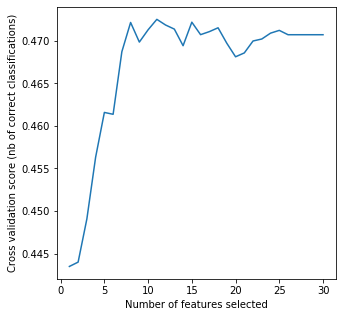

In [21]:
from xgboost import XGBClassifier
clf=XGBClassifier()
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='f1')
rfecv.fit(x_train, Y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [22]:
rfecv.grid_scores_

array([0.44348896, 0.44399772, 0.44907512, 0.45631733, 0.46157898,
       0.46136247, 0.46871218, 0.47214692, 0.46984301, 0.47128591,
       0.47251264, 0.47184753, 0.47136754, 0.46941663, 0.47217914,
       0.47071487, 0.47106885, 0.47152177, 0.46970522, 0.46811533,
       0.46857023, 0.46997169, 0.47020457, 0.47089224, 0.47121789,
       0.47070762, 0.47070762, 0.47070762, 0.47070762, 0.47070762])

In [23]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [24]:
rfecv.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  2,  3,  8,  9, 15, 11,  1,  1,  1,  1,
       10,  4,  5, 19, 12, 13, 16,  6, 18, 20,  7, 17, 14])

In [25]:
features=list(x_train.columns.values[rfecv.support_])

In [26]:
features=['Balance_Limit_V1',
 'PAY_JULY',
 'PAY_AUG',
 'PAY_SEP',
 'PAY_OCT',
 'PAY_NOV',
 'PAY_DEC',
 'PAID_AMT_JULY',
 'PAID_AMT_AUG',
 'PAID_AMT_SEP',
 'PAID_AMT_OCT']

# Splitting train set as train and cross_validation

In [27]:
x_train_2=x_train[features]

In [28]:
from sklearn.model_selection import train_test_split
x_train_1, x_validation_1, y_train, y_validation = train_test_split(x_train, Y_train, test_size = 0.2,random_state=42)

# Selecting features with rank 1(from recursive feature elimination) only 

In [29]:
x_train_1=x_train_1[features]
x_validation_1=x_validation_1[features]

# Scaling Features

In [30]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
x_train_1 = scX.fit_transform( x_train_1 )
x_validation_1 = scX.transform( x_validation_1 )

In [31]:
Dataframe_for_graphs=pd.concat([x_train_2,Y_train],axis=1)

In [32]:
Dataframe_for_graphs

,Balance_Limit_V1,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,NEXT_MONTH_DEFAULT
0,1000000,-1,-1,-1,-1,-1,-1,3437,6004,39418,162772,0
1,1000000,0,-1,-1,-1,-1,0,151818,46200,43530,80811,0
2,100000,4,3,2,2,-2,-2,0,0,0,0,1
3,200000,2,0,0,0,0,0,3855,3890,3696,4620,1
4,1000000,2,2,0,0,0,0,0,20790,16170,17325,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1000000,0,0,0,0,0,0,19635,46200,11557,7039,0
23996,400000,-1,-1,-1,-1,0,0,4243,8145,20785,298,0
23997,100000,4,3,2,-1,0,0,0,0,50820,9702,1
23998,200000,1,-1,0,0,0,-1,198429,7875,2721,4449,1


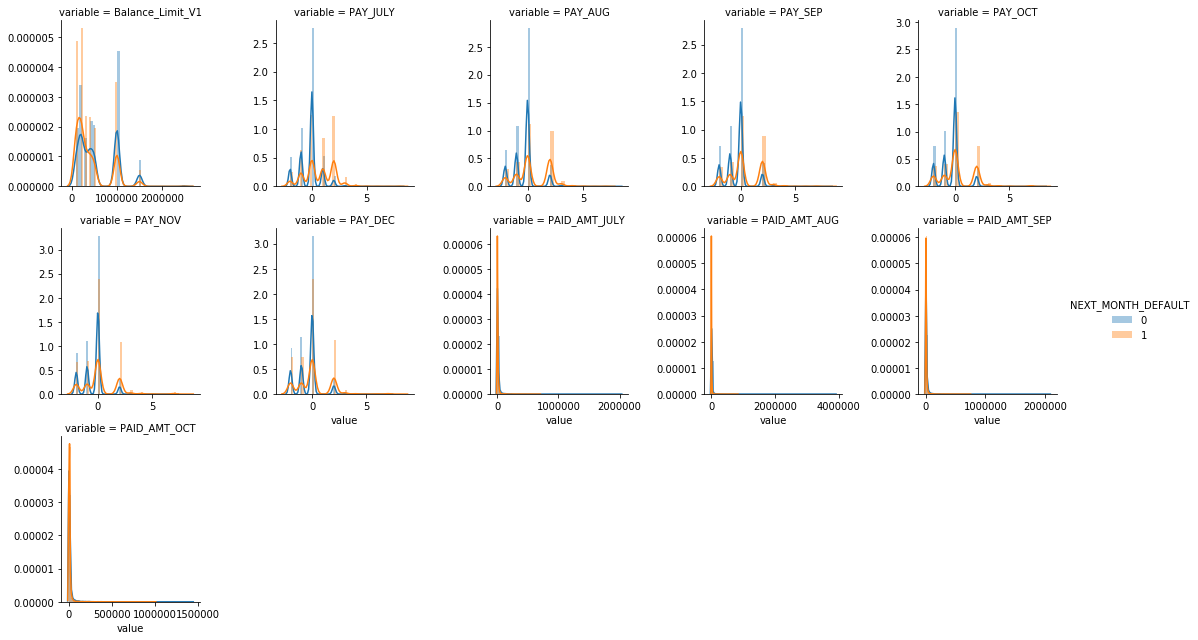

In [33]:
f = pd.melt( Dataframe_for_graphs, id_vars='NEXT_MONTH_DEFAULT', value_vars=features)
g = sns.FacetGrid( f, hue='NEXT_MONTH_DEFAULT', col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

In [34]:
Features_for_first_XGBoost=['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT','PAY_NOV', 'PAY_DEC']
Features_for_second_XGBoost=['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT','PAY_NOV', 'PAY_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG','PAID_AMT_SEP', 'PAID_AMT_OCT']

# Splitting dataset as test and validation

In [47]:
from sklearn.model_selection import train_test_split
x_train_xgb, x_validation_xgb, y_train, y_validation = train_test_split(x_train_2, Y_train, test_size = 0.2,random_state=42)

In [48]:
x_train_xgb1=x_train_xgb[Features_for_first_XGBoost]
x_validation_xgb1=x_validation_xgb[Features_for_first_XGBoost]
x_train_xgb2=x_train_xgb[Features_for_second_XGBoost]
x_validation_xgb2=x_validation_xgb[Features_for_second_XGBoost]

In [49]:
x_train_xgb1 = scX.fit_transform( x_train_xgb1 )
x_validation_xgb1 = scX.transform( x_validation_xgb1 )

In [50]:
x_train_xgb1

array([[-0.54321498,  0.01147421,  0.10586054, ...,  0.1849431 ,
         0.23135051,  0.25163461],
       [ 1.19077926, -0.87685194, -0.72340194, ..., -0.67131625,
         0.23135051,  0.25163461],
       [-0.79092845,  0.89980037,  1.7643855 , ...,  0.1849431 ,
         0.23135051,  0.25163461],
       ...,
       [ 1.19077926, -0.87685194, -0.72340194, ...,  0.1849431 ,
        -0.65068479, -0.61685083],
       [-0.54321498,  0.01147421,  0.10586054, ...,  0.1849431 ,
         0.23135051,  0.25163461],
       [ 2.42934658,  0.01147421,  0.10586054, ...,  0.1849431 ,
         0.23135051, -1.48533626]])

In [51]:
x_validation_xgb1

array([[-0.04778806, -0.87685194,  0.10586054, ...,  0.1849431 ,
        -0.65068479, -0.61685083],
       [-0.29550152,  0.01147421,  0.10586054, ...,  1.89746179,
         0.23135051,  0.25163461],
       [-0.79092845,  0.01147421,  0.10586054, ...,  0.1849431 ,
        -0.65068479, -0.61685083],
       ...,
       [ 1.19077926,  1.78812652,  0.10586054, ...,  0.1849431 ,
         0.23135051,  0.25163461],
       [-1.03864191, -0.87685194, -0.72340194, ...,  0.1849431 ,
         0.23135051, -0.61685083],
       [-0.79092845,  0.01147421,  0.10586054, ...,  0.1849431 ,
         0.23135051,  0.25163461]])

In [52]:
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [53]:
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier 

In [54]:
import warnings
warnings.simplefilter('ignore')

In [55]:
classifier2 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (20,40,20),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)

classifier4 = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_depth = 10,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)
classifier5 =XGBClassifier()

In [56]:
sclf = StackingCVClassifier(classifiers = [classifier2, classifier4,classifier5],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))

In [57]:
classifiers = {"MLP": classifier2,
               "RF": classifier4,
               "XGB":classifier5,
               "Stack": sclf}

In [58]:
for key in classifiers:
    classifier = classifiers[key]
    
    classifier.fit(x_train_xgb1,y_train)
        
    classifiers[key] = classifier

In [59]:
result = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(x_validation_xgb1)[:,1]
    
    # Save results in pandas dataframe object
    result[f"{key}"] = y_pred

# Add the test set to the results object
y_validation['NEXT_MONTH_DEFAULT']=y_validation['NEXT_MONTH_DEFAULT'].astype(float)
result["Target"] = y_validation

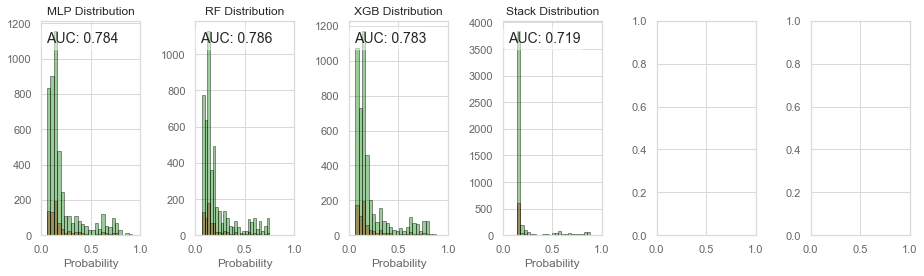

In [60]:
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 6)

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = result[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_validation, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = result[result["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = result[result["Target"] == 1]
    sns.distplot(result[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

In [61]:
for key in classifiers:
    for i in range(4800):
        if result[key].loc[i]>0.5:
            result.loc[i:i,(key)]=int(1)
        else:
            result.loc[i:i,(key)]=int(0)

In [62]:
result

,MLP,RF,XGB,Stack,Target
0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...
4795,0.0,0.0,0.0,0.0,NaN
4796,0.0,0.0,0.0,0.0,NaN
4797,1.0,1.0,1.0,1.0,NaN
4798,0.0,0.0,0.0,0.0,NaN


In [63]:
for key in classifiers:
    print(classification_report(y_validation,result[key]))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      3745
         1.0       0.70      0.38      0.49      1055

    accuracy                           0.83      4800
   macro avg       0.77      0.67      0.70      4800
weighted avg       0.81      0.83      0.81      4800

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.90      3745
         1.0       0.70      0.38      0.49      1055

    accuracy                           0.83      4800
   macro avg       0.77      0.67      0.69      4800
weighted avg       0.81      0.83      0.81      4800

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      3745
         1.0       0.70      0.37      0.49      1055

    accuracy                           0.83      4800
   macro avg       0.77      0.66      0.69      4800
weighted avg       0.81      0.83      0.81      4800

              preci